# Набор данных о курении и употреблении алкоголя с сигналом тела

## Подключение модулей

In [1]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve

In [2]:
# Импортируем классификаторы
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [3]:
# вывод графиков здесь
%matplotlib inline

## Загрузка данных

In [4]:
# Загрузка данных
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')

In [5]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


### Описание данных

Признаки:

Sex - пол мужской, женский

Age - округленно до 5 лет

Height - округленно до 5 см[см]

Weight [kg] - Вес [кг]

Waistline - Талия

Sight_left - левый глаз, насколько хорошо видит глаз, где идеальное зрение = 1,0

Sight_right - правый глаз, насколько хорошо видит глаз, где идеальное зрение = 1,0

Hear_left - слух слева, 1 (нормальный), 2 (ненормальный)

Hear_right - слух справа, 1 (нормальный), 2 (ненормальный)

SBP - систолическое артериальное давление [мм рт.ст.]

DBP - диастолическое артериальное давление [мм рт.ст.]

BLDS - уровень глюкозы в крови натощак или ФСГ [мг/дл]

Tot_chole - общий холестерин [мг/дл]

HDL_chole - холестерин высокой плотности (HDL) [мг/дл] - единственная фракция холестерина, которую называют "хорошим","полезным" холестерином.

LDL_chole - холестерин низкой плотности (LDL) [мг/дл]

Triglyceride -  триглицериды [мг/дл]

Hemoglobin - гемоглобин [г/дл]

Urine_protein - белок в моче., 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)

Serum_creatinine - уровень креатинина в крови [мг/дл]

SGOT_AST - уровень глутамат-оксалоацетаттрансферазы (Глутамат-оксалоацетаттрансферазы) и АСТ(аспартаттрансферазы)[МЕ/л]

SGOT_ALT - АЛТ(аланиновая трансаминаза)[МЕ/л]

Gamma_GTP - y-глутамилтранспептидаза[МЕ/л]

SMK_stat_type_cd - Состояние курильщика, 1(никогда не курил), 2(раньше курил, но бросил), 3 (все еще курю)

DRK_YN - Пьющий или нет (Y-Да/N-Нет)

## Стадии решения задачи
- подключение модулей (import modules)
- загрузка данных (data lodaing)
- разведочный анализ данных (exploratory data analysis, EDA)
- предварительная обработка данных (preprocessing)
- обучение моделей (models fitting)
- прогнозирование (prediction)

## Разведочный анализ данных (РАД, EDA)

На какие вопросы может дать ответы РАД?
- сколько у нас данных? (кол-во объектов и их признаков)
- какие типы данных имеют признаки?
- какой признак является целевым (target)? С какой задачей мы имеем дело? (классификация или регрессия)
- сколько значений пропущено в различных колонках?
- какова статистика распределения значений признаков? Есть ли выбросы (аномальные наблюдения)?
- как признаки соотносятся между собой (коррелируют, влияют друг на друга)? Как признаки влияют на целевой признак?
- и др.


In [6]:
# объём данных (строк и столбцов - объектов и признаков)
df.shape

(991346, 24)

В дата-сете почти миллион строк и 24 атрибута

In [7]:
# выводим типы данных
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

В основном данные имеют тип - float, но также присутствует int и object.

Целевой признак - DRK_YN

In [8]:
# Вывод информации о книге
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [9]:
# имена колонок в виде списка
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [10]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

Дата-сет не имеет пропусков

In [11]:
# сколько уникальных значений в колонках? 
for col in df.columns:
    print("Количество уникальных значений в колонке %s = %d: " % (col, df[col].nunique()))

Количество уникальных значений в колонке sex = 2: 
Количество уникальных значений в колонке age = 14: 
Количество уникальных значений в колонке height = 13: 
Количество уникальных значений в колонке weight = 24: 
Количество уникальных значений в колонке waistline = 737: 
Количество уникальных значений в колонке sight_left = 24: 
Количество уникальных значений в колонке sight_right = 24: 
Количество уникальных значений в колонке hear_left = 2: 
Количество уникальных значений в колонке hear_right = 2: 
Количество уникальных значений в колонке SBP = 171: 
Количество уникальных значений в колонке DBP = 127: 
Количество уникальных значений в колонке BLDS = 498: 
Количество уникальных значений в колонке tot_chole = 474: 
Количество уникальных значений в колонке HDL_chole = 223: 
Количество уникальных значений в колонке LDL_chole = 432: 
Количество уникальных значений в колонке triglyceride = 1657: 
Количество уникальных значений в колонке hemoglobin = 190: 
Количество уникальных значений в к

Количество уникальных значений варьируется от 2 до 1657

In [12]:
# исследование целевого (target) признака - пьет ли пациент 
print('Кол-во уникальных значений в таргете: ', df['DRK_YN'].nunique())
print('перечень уникальных значений в таргете: ', df['DRK_YN'].unique())
print('статистика распределения значений в таргете: \n', df['DRK_YN'].value_counts(normalize=True))

Кол-во уникальных значений в таргете:  2
перечень уникальных значений в таргете:  ['Y' 'N']
статистика распределения значений в таргете: 
 DRK_YN
N    0.500187
Y    0.499813
Name: proportion, dtype: float64


Целевой признак имеет 2 значения: Y или N. N больше на 0,01

In [13]:
# описательная статистика для признака Age
df['age'].describe()

count    991346.000000
mean         47.614491
std          14.181339
min          20.000000
25%          35.000000
50%          45.000000
75%          60.000000
max          85.000000
Name: age, dtype: float64

Минимальный возраст 20, а максимальный 85. Возраст имеет нормальное распределение

In [14]:
# описательная статистика для всех (числовых) признаков
df.describe(include='all')

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
count,991346,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
freq,526415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,495858
mean,NaN,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,...,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122,NaN
std,NaN,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,...,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507,NaN
min,NaN,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,...,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,...,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,NaN
50%,NaN,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,NaN
75%,NaN,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,...,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000,NaN


In [15]:
df['DBP'].describe()

count    991346.000000
mean         76.052627
std           9.889365
min          32.000000
25%          70.000000
50%          76.000000
75%          82.000000
max         185.000000
Name: DBP, dtype: float64

In [16]:
# Выводим оставшиеся столбцы
df['BLDS'].describe()

count    991346.000000
mean        100.424447
std          24.179960
min          25.000000
25%          88.000000
50%          96.000000
75%         105.000000
max         852.000000
Name: BLDS, dtype: float64

In [17]:
df['tot_chole'].describe()

count    991346.000000
mean        195.557020
std          38.660155
min          30.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2344.000000
Name: tot_chole, dtype: float64

In [18]:
df['HDL_chole'].describe()

count    991346.000000
mean         56.936800
std          17.238479
min           1.000000
25%          46.000000
50%          55.000000
75%          66.000000
max        8110.000000
Name: HDL_chole, dtype: float64

В основном люди имеют рост около 170 см и вес 70 кг.

Минимальное значение веса - 25 кг и это при минимальном возрасте в 20 лет. Также максимальное значение веса 140 кг, при максимальном росте в 190 см. Нормальный вес при росте 190 составляет около 75 кг.

Талия в 999 см и 8 см. 

Несколько значений систалического артериального давления имеют слишком высокие показатели. Такая же проблема прослеживается у диастолического артериального давления, уровня глюкозы в крови, холестерина и, в основном, у всех характеристик.

Будем считать, что это были неправильно введенные данные. 

У большинства людей хорошее зрение и слух. 

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'waistline'}>,
        <Axes: title={'center': 'sight_left'}>],
       [<Axes: title={'center': 'sight_right'}>,
        <Axes: title={'center': 'hear_left'}>,
        <Axes: title={'center': 'hear_right'}>,
        <Axes: title={'center': 'SBP'}>, <Axes: title={'center': 'DBP'}>],
       [<Axes: title={'center': 'BLDS'}>,
        <Axes: title={'center': 'tot_chole'}>,
        <Axes: title={'center': 'HDL_chole'}>,
        <Axes: title={'center': 'LDL_chole'}>,
        <Axes: title={'center': 'triglyceride'}>],
       [<Axes: title={'center': 'hemoglobin'}>,
        <Axes: title={'center': 'urine_protein'}>,
        <Axes: title={'center': 'serum_creatinine'}>,
        <Axes: title={'center': 'SGOT_AST'}>,
        <Axes: title={'center': 'SGOT_ALT'}>],
       [<Axes: title={'center': 'gamma_GTP'}>,
        <Axes: title={'center

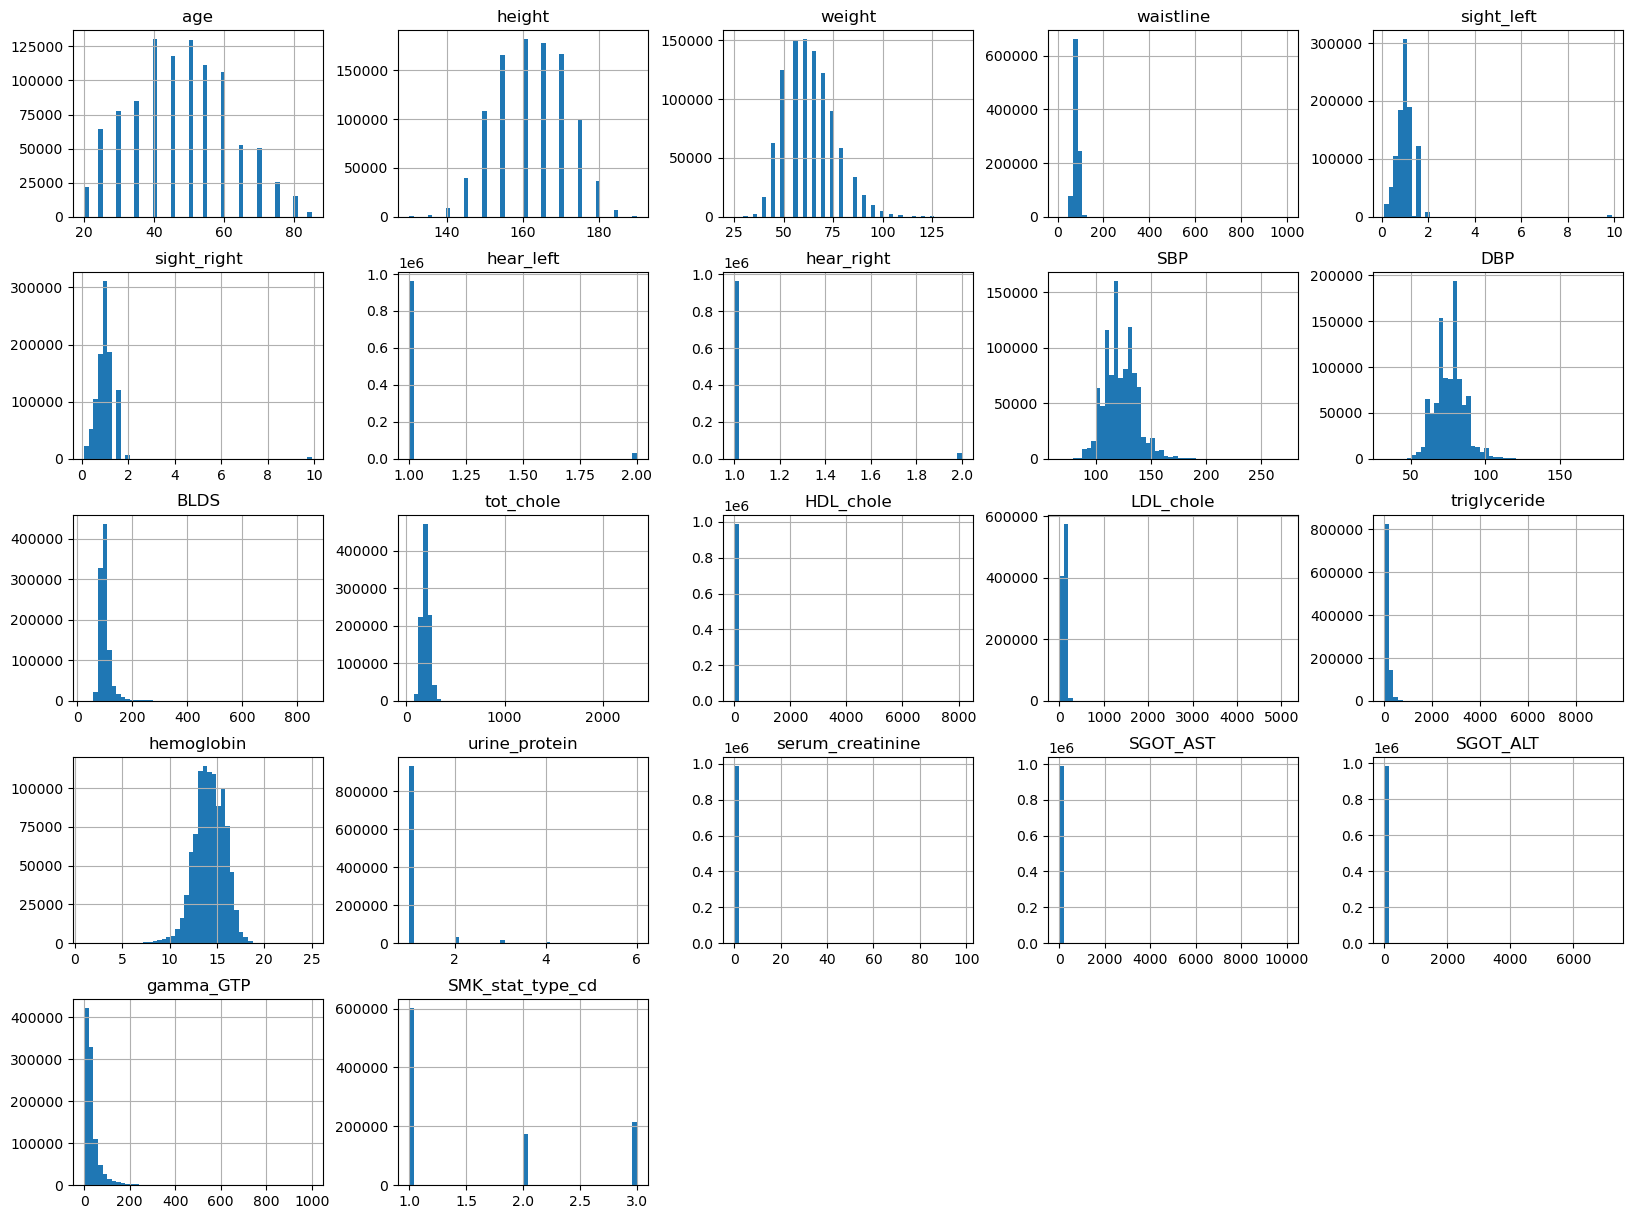

In [19]:
# гистаграммы всех признаков до их изменений
df.hist(figsize = (20,15), bins = 50)

Данные неравномерно рапределены между собой.

In [20]:
# Высчитываем дубликаты
df.duplicated().sum()

26

В дата сете найдены дубликаты.

In [21]:
# Удаляем дубликаты
df.drop_duplicates(inplace=True)
df.shape

(991320, 24)

Дубликаты удалены.

In [22]:
# Вычисляем процент выбросов в числовых столбцах 
for col in df.columns:
    if (col == "DRK_YN" or col == "sex" or col == "hear_left" or col == "hear_right"):
        continue
    q1 = df[col].quantile(0.25)
    print(f"Значение певрого квартиля в столбце {col}: {q1}")
    q3 = df[col].quantile(0.75)
    print(f"Значение третьего квартиля в столбце {col}: {q3}")
    
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
    percentage_outliers = len(outliers) / len(df[col]) * 100
    print(f"Процент выбросов в столбце {col}: {percentage_outliers:.2f}%")
    if (percentage_outliers >= 3.0):
        df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]
        outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
        percentage_outliers = len(outliers) / len(df[col]) * 100
        print(f"Процент выбросов в столбце {col} после удаления: {percentage_outliers:.2f}%")
    elif (percentage_outliers < 3.0):
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])
        df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]
        outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
        percentage_outliers = len(outliers) / len(df[col]) * 100
        print(f"Процент выбросов в столбце {col} после замены на медианное значение: {percentage_outliers:.2f}%")
    print()

Значение певрого квартиля в столбце age: 35.0
Значение третьего квартиля в столбце age: 60.0
Процент выбросов в столбце age: 0.00%
Процент выбросов в столбце age после замены на медианное значение: 0.00%

Значение певрого квартиля в столбце height: 155.0
Значение третьего квартиля в столбце height: 170.0
Процент выбросов в столбце height: 0.01%
Процент выбросов в столбце height после замены на медианное значение: 0.00%

Значение певрого квартиля в столбце weight: 55.0
Значение третьего квартиля в столбце weight: 70.0
Процент выбросов в столбце weight: 1.94%
Процент выбросов в столбце weight после замены на медианное значение: 0.00%

Значение певрого квартиля в столбце waistline: 74.1
Значение третьего квартиля в столбце waistline: 87.8
Процент выбросов в столбце waistline: 0.45%
Процент выбросов в столбце waistline после замены на медианное значение: 0.00%

Значение певрого квартиля в столбце sight_left: 0.7
Значение третьего квартиля в столбце sight_left: 1.2
Процент выбросов в столбц

Столбцы age, SMK_stat_type_cd и height почти или вовсе не имеют выбросов, поэтому оставим их без изменений.

Высокий процент выбросов у столбцов gamma_GTP, SGOT_ALT, SGOT_AST, triglyceride и BLDS, удалим их. Процент оставшихся столбцов довольно мал, но не будем оставлять и их без внимания: заменим их на среднее значение.

In [23]:
# размер датафрейма после обработки
df.shape

(687055, 24)

## Визуальный анализ

<Axes: xlabel='DRK_YN'>

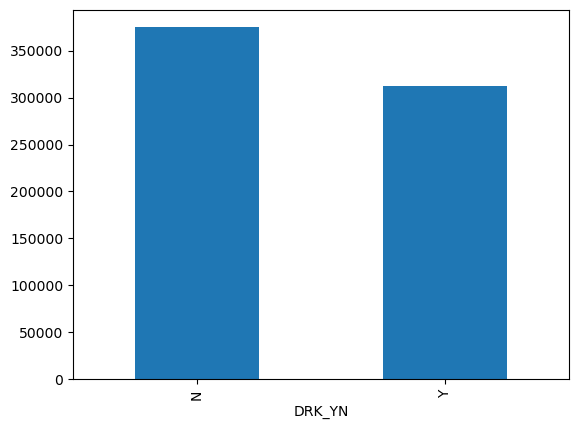

In [24]:
# Выводим соотношение значений в графике
df['DRK_YN'].value_counts(normalize=False).plot.bar()

In [25]:
# Общее соотношение значений
df['DRK_YN'].value_counts()

DRK_YN
N    374771
Y    312284
Name: count, dtype: int64

Людей независимых от алкоголя на 54 000 больше.

<Axes: >

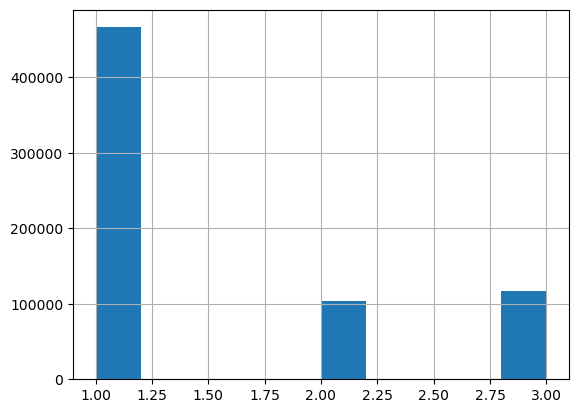

In [26]:
# Соотношение значений в столбце SMK_stat_type_cd
df['SMK_stat_type_cd'].hist(range=(1,3))

<Axes: ylabel='proportion'>

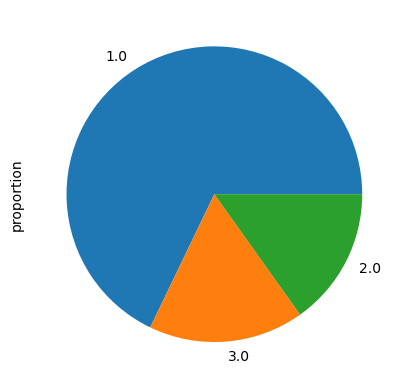

In [27]:
# Соотношение значений в столбце SMK_stat_type_cd
df['SMK_stat_type_cd'].value_counts(normalize=True).plot.pie()
# 1(никогда не курил), 2(раньше курил, но бросил), 3 (все еще курю)

Преобладающее значение имеют некурящие никогда люди

<Axes: ylabel='proportion'>

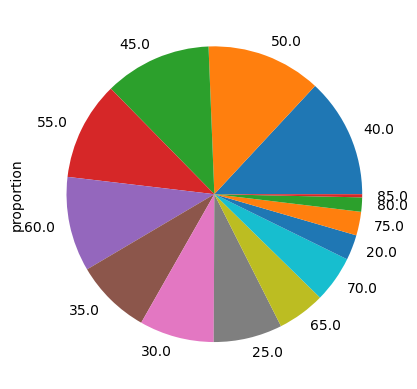

In [28]:
# Соотношение значений в столбце age
df['age'].value_counts(normalize=True).plot.pie()

In [29]:
# Количество уникальных значений в столбце age
df['age'].nunique()

14

In [30]:
# Вывод количесвта этих уникальных значений
df['age'].value_counts()

age
40.0    89843
50.0    86235
45.0    80506
55.0    74097
60.0    71191
35.0    56831
30.0    56108
25.0    51619
65.0    35917
70.0    34868
20.0    18992
75.0    17765
80.0    10727
85.0     2356
Name: count, dtype: int64

<Axes: ylabel='age'>

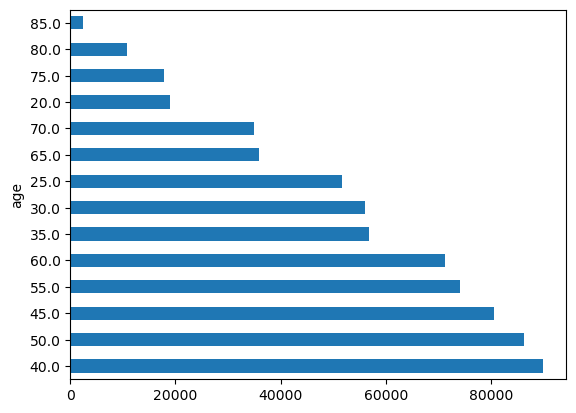

In [31]:
# Вывод в виде графика
df['age'].value_counts().plot.barh()

Пробладает рабочее поколение: от 45 до 55 лет. Максимальное значение - 85. 

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'waistline'}>,
        <Axes: title={'center': 'sight_left'}>],
       [<Axes: title={'center': 'sight_right'}>,
        <Axes: title={'center': 'hear_left'}>,
        <Axes: title={'center': 'hear_right'}>,
        <Axes: title={'center': 'SBP'}>, <Axes: title={'center': 'DBP'}>],
       [<Axes: title={'center': 'BLDS'}>,
        <Axes: title={'center': 'tot_chole'}>,
        <Axes: title={'center': 'HDL_chole'}>,
        <Axes: title={'center': 'LDL_chole'}>,
        <Axes: title={'center': 'triglyceride'}>],
       [<Axes: title={'center': 'hemoglobin'}>,
        <Axes: title={'center': 'urine_protein'}>,
        <Axes: title={'center': 'serum_creatinine'}>,
        <Axes: title={'center': 'SGOT_AST'}>,
        <Axes: title={'center': 'SGOT_ALT'}>],
       [<Axes: title={'center': 'gamma_GTP'}>,
        <Axes: title={'center

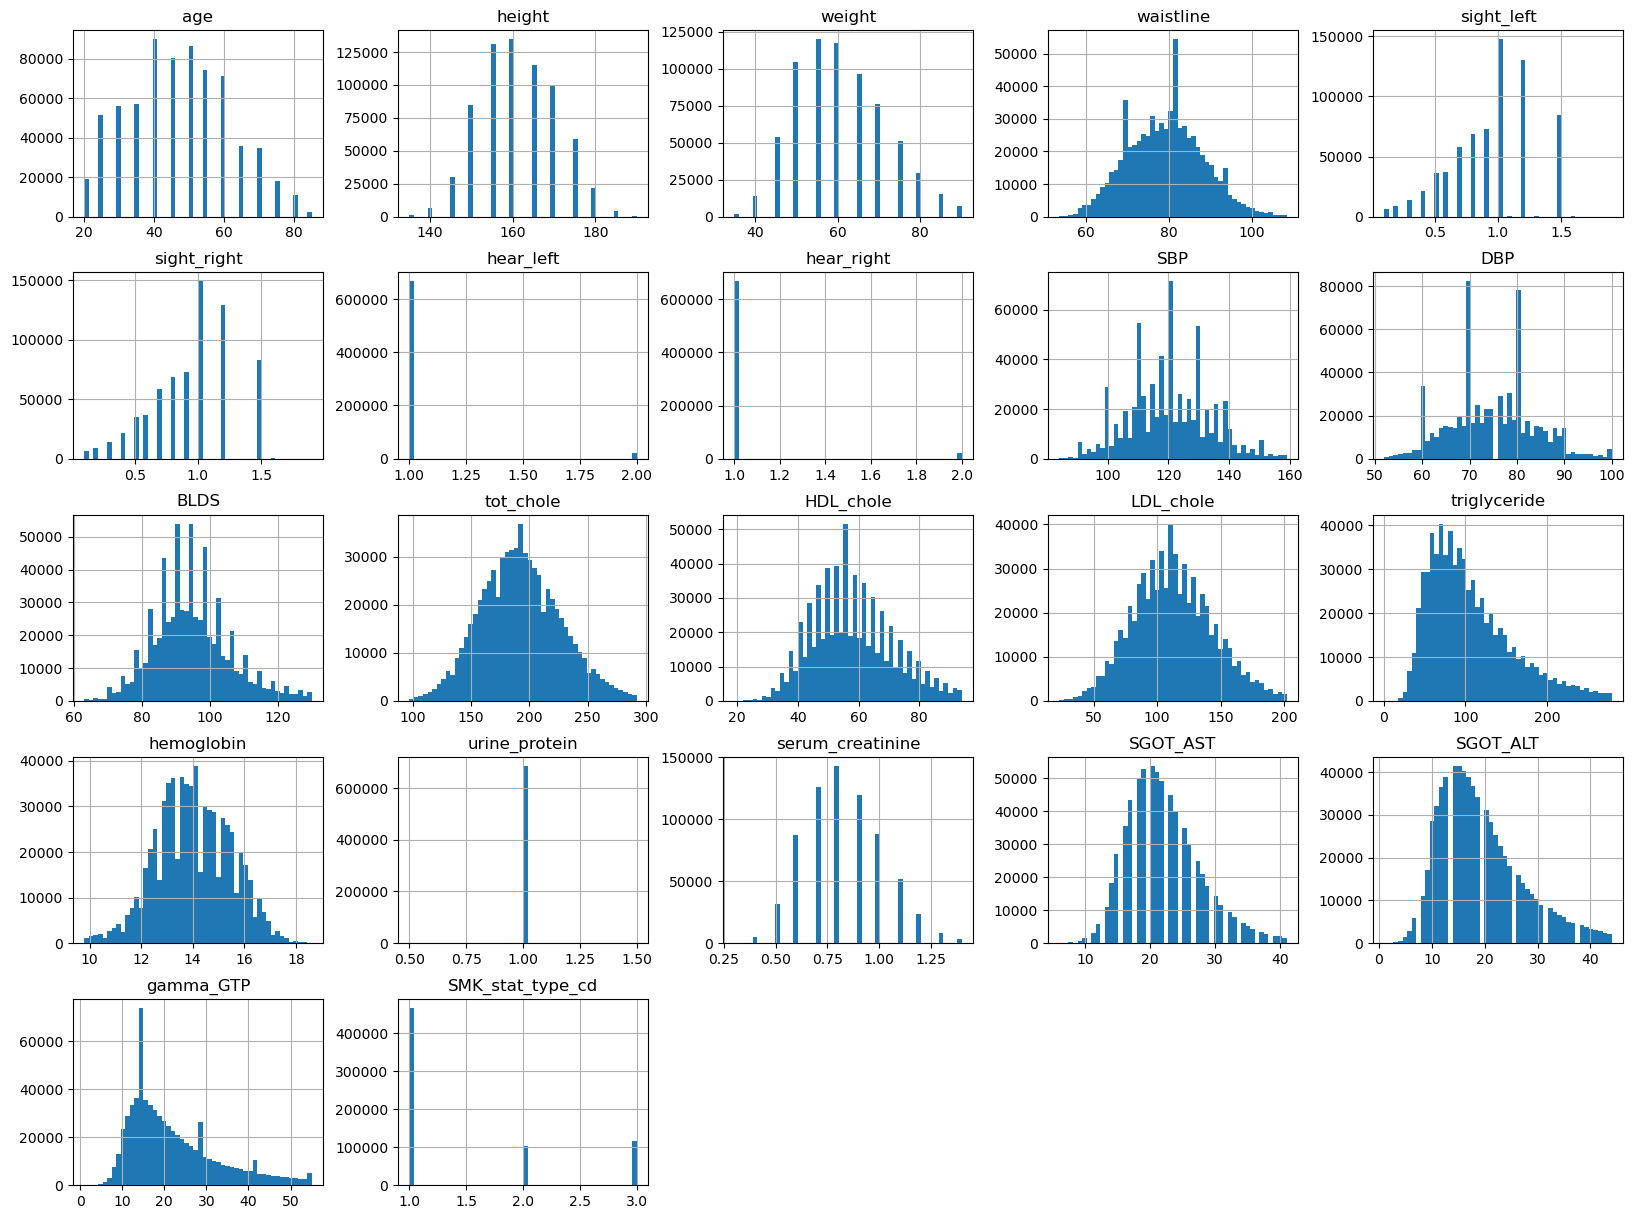

In [32]:
# гистаграммы всех признаков
df.hist(figsize = (20,15), bins = 50)

Значения более менее нормально распределены, но были замечены большие отклонения, но было решено их оставить, так как это часто встречающиеся значения.

<Axes: >

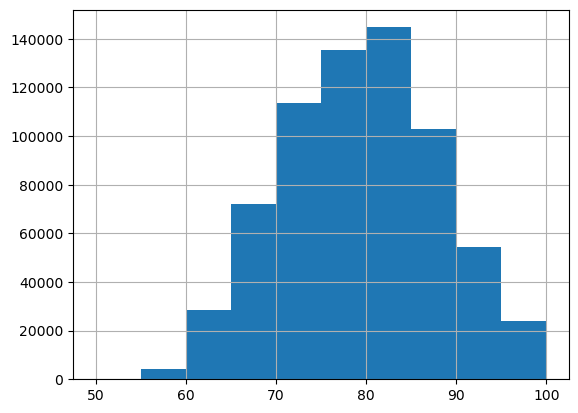

In [33]:
# Гистограмма waistline в определенном промежутке
df['waistline'].hist(range=(50,100))

В основном значения waistline распределено в промежутке от 5 до 100.

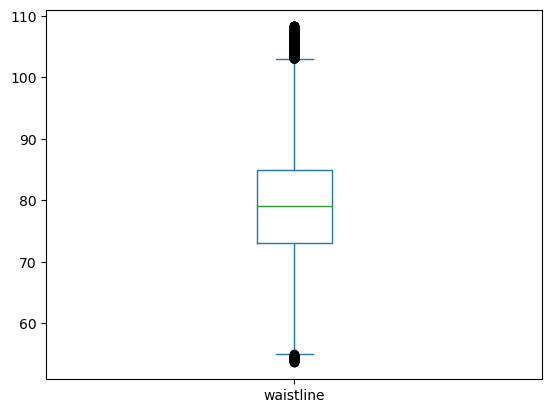

In [34]:
# "ящик с усами" (boxplot) для визуализации распределения вероятностей значений признака
df['waistline'].plot.box()
plt.show() 

По "ящику с усами" понятно, что значения waistline варьируются от 55 до 120. Имеются выбросы, которые являются нормальными.

<Axes: ylabel='Density'>

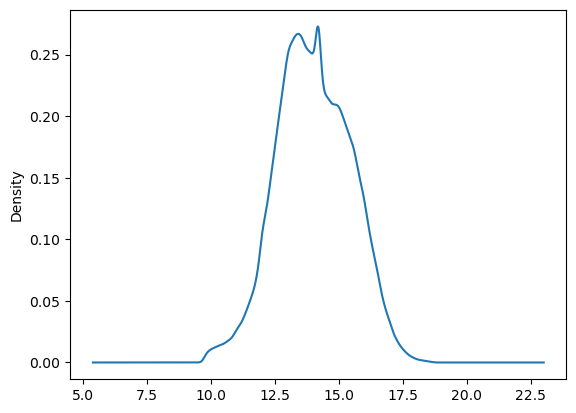

In [35]:
# график плотности распределения признака
df['hemoglobin'].plot.density()

In [36]:
# список признаков для анализа
features_eda = ['age', 'sex', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 
                  'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride',
                'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST' ,'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd',
                'DRK_YN']

In [37]:
# Меняем значение 2-значных характеристик на 0 и 1
df['sex']= df['sex'].map({'Male':0, 'Female':1})
df['DRK_YN']= df['DRK_YN'].map({'Y':0, 'N':1})

In [38]:
# матрица коррелаций в виде таблицы
corr = df[features_eda].corr()
corr

,age,sex,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
age,1.000000,0.063106,-0.390100,-0.132424,0.232717,-0.380351,-0.372598,0.206193,0.201343,0.290126,...,0.100670,0.169931,-0.160183,NaN,0.018120,0.274990,0.101780,0.071626,-0.106395,0.296066
sex,0.063106,1.000000,-0.718406,-0.576634,-0.405095,-0.158277,-0.163087,-0.011744,-0.007134,-0.162836,...,-0.008391,-0.175565,-0.682570,NaN,-0.610146,-0.137799,-0.307292,-0.408948,-0.583859,0.318244
height,-0.390100,-0.718406,1.000000,0.643274,0.280108,0.272065,0.272608,-0.077960,-0.080303,0.017355,...,-0.029329,0.063810,0.538324,NaN,0.441806,-0.017495,0.175748,0.252152,0.457318,-0.348847
weight,-0.132424,-0.576634,0.643274,1.000000,0.730831,0.154114,0.155482,-0.031742,-0.034430,0.229892,...,0.074525,0.252782,0.475190,NaN,0.393229,0.082497,0.346301,0.359216,0.343462,-0.229373
waistline,0.232717,-0.405095,0.280108,0.730831,1.000000,-0.037682,-0.034359,0.059394,0.055576,0.330861,...,0.109356,0.334998,0.323923,NaN,0.281962,0.169046,0.369734,0.368416,0.223650,-0.068727
sight_left,-0.380351,-0.158277,0.272065,0.154114,-0.037682,1.000000,0.712212,-0.109459,-0.105780,-0.099533,...,-0.006545,-0.033143,0.162501,NaN,0.079732,-0.076076,0.022689,0.032590,0.108110,-0.157517
sight_right,-0.372598,-0.163087,0.272608,0.155482,-0.034359,0.712212,1.000000,-0.109132,-0.107141,-0.095781,...,-0.004589,-0.030294,0.164704,NaN,0.083079,-0.073309,0.024014,0.034162,0.109302,-0.155415
hear_left,0.206193,-0.011744,-0.077960,-0.031742,0.059394,-0.109459,-0.109132,1.000000,0.536568,0.063786,...,-0.005299,0.027345,-0.028461,NaN,0.023299,0.052378,0.004426,0.009447,-0.013446,0.058181
hear_right,0.201343,-0.007134,-0.080303,-0.034430,0.055576,-0.105780,-0.107141,0.536568,1.000000,0.064302,...,-0.004552,0.026106,-0.030455,NaN,0.019010,0.051221,0.003349,0.008555,-0.015083,0.058801
SBP,0.290126,-0.162836,0.017355,0.229892,0.330861,-0.099533,-0.095781,0.063786,0.064302,1.000000,...,0.057806,0.197221,0.148990,NaN,0.117600,0.152518,0.179038,0.206358,0.061985,0.004882


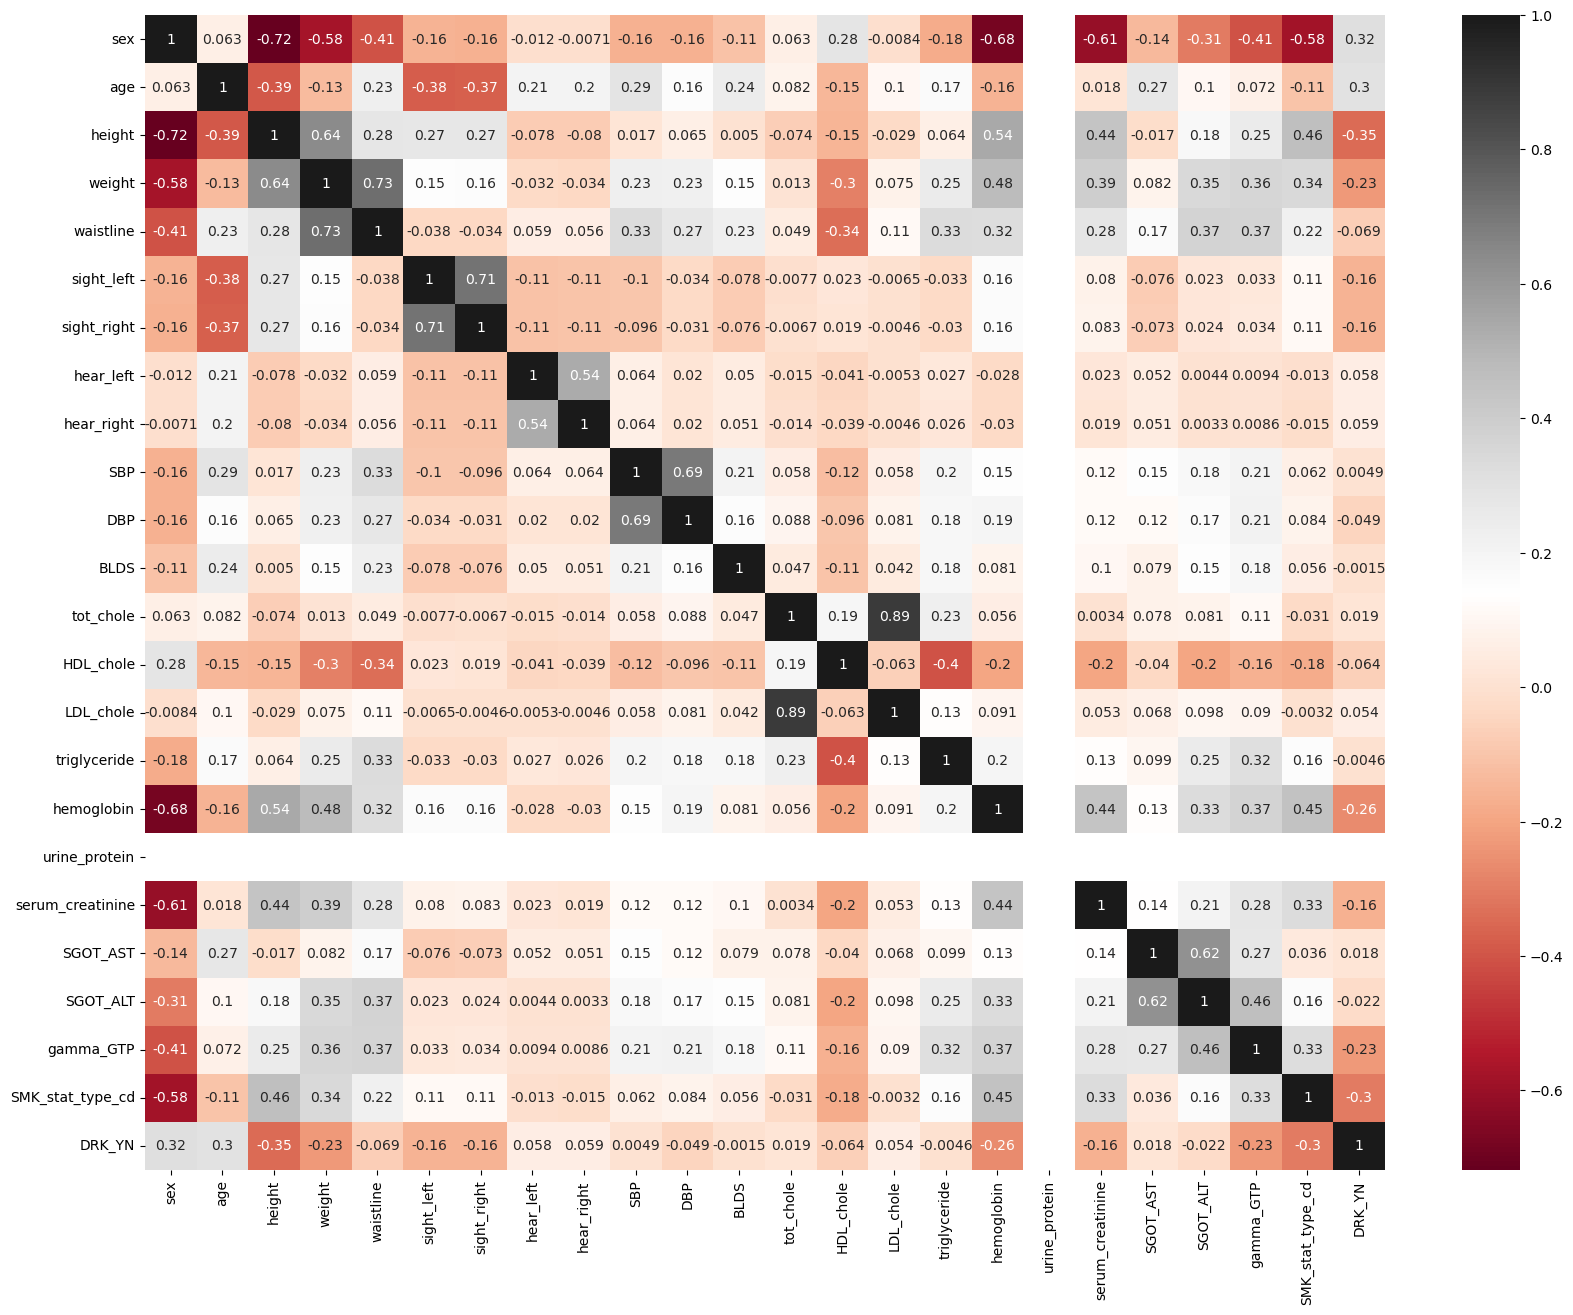

In [39]:
# матрица коррелаций в виде графика
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),cmap = 'RdGy',annot = True,cbar=True);

С помощью корреляции можно заметить, что большее значение на целевую переменную имеет пол и возраст. Сильная зависимость замечена между LDL_chole и tot_chole, hemoglobin и weight, SBP и DBP и т.д.

## Предварительная обработка данных (preprocessing)

Какие действия выполняются в процессе предварительной подготовки?
- формирование дата-сета для обучения моделей (исключение признаков, объединение с фиктивными признаками и др.)

### Формирование дата-сета для обучения моделей

In [40]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df['DRK_YN']

In [41]:
# Копируем датасет
del df['DRK_YN']
X = df.copy()

In [42]:
# Разделяем выборку на обучающую и тестовую 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(460326, 23) (226729, 23) (460326,) (226729,)


In [43]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(460326, 23) (226729, 23) (460326,) (226729,)


## Обучение моделей

Для нашего датасета хорошо подходят модели классификации, которые могут хорошо работать с нормальной, сбалансированной, распределенной моделью данных. Вот несколько таких моделей:
- Классификация ближайших соседей
- Наивный байесовский классификатор
- Классификатор древа решений

Почему они подходят для нашей модели?
- KNN: При нормальном распределении данных ближайшие соседи имеют большее влияние на классификацию. Это может привести к более точному результату.

- Наивный Байес: Нормальное распределение сделает предположение о независимости признаков более верным. Это может улучшить точность классификации.

- Дерево решений: Дерево решений может легко разделить нормально распределенные данные на разные классы, особенно если у них четкая структура. 

### KNeighborsClassifier (Классификация ближайших соседей)

In [44]:
# Методом ближайших соседей
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
# Делаем предсказание на основе тестовой выборки
knn_test_pred = knn.predict(X_test)

In [46]:
# Делаем предсказание на основе тренировочной выборки
knn_train_pred = knn.predict(X_train)

In [47]:
# Выводим точность (precision), полноту (recall), F1-меру и поддержку (support) для этого метода
print(classification_report(y_test, knn_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62    103198
           1       0.68      0.69      0.69    123531

    accuracy                           0.66    226729
   macro avg       0.65      0.65      0.65    226729
weighted avg       0.65      0.66      0.65    226729



In [48]:
# Выводм долю верных предсказаний тренеровочной и тестовой выборки. 
print('train accuracy: ', accuracy_score(y_train, knn_train_pred, normalize=True))
print('test accuracy: ', accuracy_score(y_test, knn_test_pred, normalize=True))

train accuracy:  0.7688464262283686
test accuracy:  0.6550772067093314


Значения precision и recall около 0.65 для обоих классов показывают, что модель справляется с классификацией относительно хорошо, но не идеально. F1-мера около 0.65 для обоих классов указывает на то, что модель показывает хороший баланс между точностью и полнотой.  Модель правильно классифицирует около 66% объектов. 

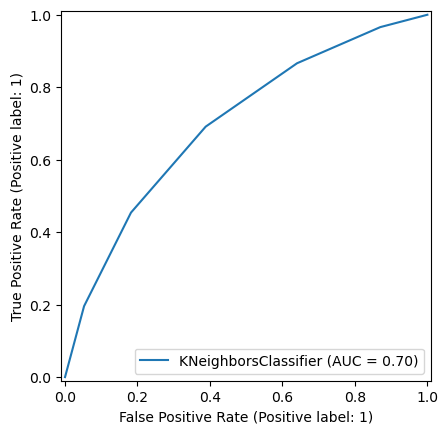

In [49]:
# Выводим кривую
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

Кривая имеет хороший показатель 0,7

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [50]:
# метод Гаусса
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [51]:
# Делаем предсказание на основе тестовой выборки
gnb_test_pred = knn.predict(X_test)

In [52]:
# Делаем предсказание на основе тренировочной выборки
gnb_train_pred = knn.predict(X_train)

In [53]:
# Выводим точность (precision), полноту (recall), F1-меру и поддержку (support) для этого метода
print(classification_report(y_test, gnb_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62    103198
           1       0.68      0.69      0.69    123531

    accuracy                           0.66    226729
   macro avg       0.65      0.65      0.65    226729
weighted avg       0.65      0.66      0.65    226729



In [54]:
# Выводм долю верных предсказаний тренеровочной и тестовой выборки. 
print('train accuracy: ', accuracy_score(y_train, gnb_train_pred, normalize=True))
print('test accuracy: ', accuracy_score(y_test, gnb_test_pred, normalize=True))

train accuracy:  0.7688464262283686
test accuracy:  0.6550772067093314


F1-мера для обоих классов схожа, что означает, что модель имеет сбалансированную способность идентифицировать положительные и отрицательные случаи для каждого класса. Однако точность немного ниже, чем полнота, что может свидетельствовать о том, что модель может лучше идентифицировать положительные случаи, чем избегать ложноположительных.

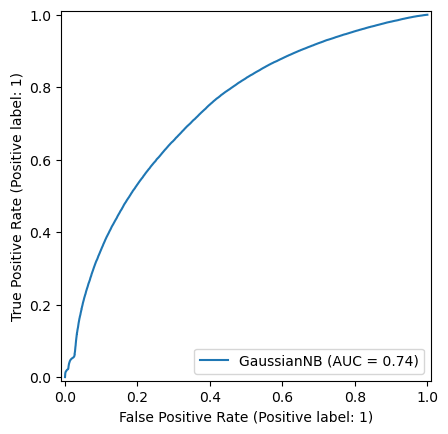

In [55]:
# Выводим кривую
svc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

Кривая имеет хороший показатель - 0,74

### Random Forest Classifier (Классификатор дерева решений)

In [56]:
# Классификатор дерева решений
rfc  = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
# Делаем предсказание на основе тестовой выборки
rfc_test_pred = rfc.predict(X_test)

In [58]:
# Делаем предсказание на основе тренировочной выборки
rfc_train_pred = rfc.predict(X_train)

In [59]:
# Выводим точность (precision), полноту (recall), F1-меру и поддержку (support) для этого метода
print(classification_report(y_test, rfc_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69    103198
           1       0.74      0.75      0.74    123531

    accuracy                           0.72    226729
   macro avg       0.71      0.71      0.71    226729
weighted avg       0.72      0.72      0.72    226729



Точность улучшилась для обоих классов. Теперь модель более точно предсказывает как класс 0, так и класс 1. Модель лучше выявляет истинные положительные случаи. Модель лучше сбалансировала способность избегать ложноположительных и ложноотрицательных предсказаний. Точность повысилась до 72%. Это означает, что модель в целом стала более точной при классификации примеров.

In [60]:
# Выводм долю верных предсказаний тренеровочной и тестовой выборки. 
print('train accuracy: ', accuracy_score(y_train, rfc_train_pred, normalize=True))
print('test accuracy: ', accuracy_score(y_test, rfc_test_pred, normalize=True))

train accuracy:  0.9999934828795245
test accuracy:  0.7167675947937846


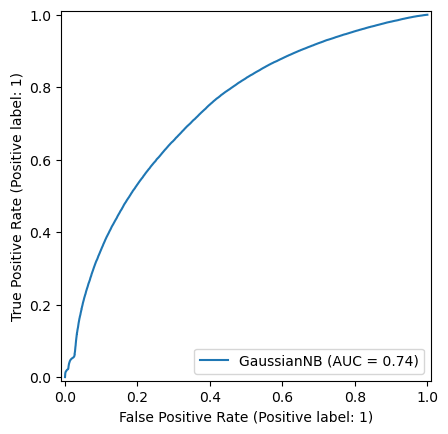

In [61]:
# Выводим кривую
svc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

Кривая имеет хороший показатель - 0,74

## Сравнение результатов обучения моделей

Лучшие результаты показала модель Модель Random Forest Classifier, так как все ее показатели выше 70%. Две оставшиеся модели показали идентичные результаты и их показатели находятся в промежутке от 60% до 70%.

Модель Random Forest Classifier обучилась лучше всего, поэтому мы будем в дальнейшем использовать ее.

## Гиперпараметры

In [62]:
# Определяем оптимальное количество деревьев
param_grid = {'n_estimators': [100, 150, 200]}
rfc_gs = RandomForestClassifier()

In [63]:
#Н Находим оптимальные гиперпараметры для модели Random Forest Classifier (rfc_gs)
grid_search = GridSearchCV(estimator=rfc_gs, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 150, 200]})

In [64]:
# Выводим наилучший параметр
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'n_estimators': 200}


In [68]:
# Обучаем модель Random Forest Classifier с фиксированным количеством параметров
rfc_gs = RandomForestClassifier(n_estimators=200)
rfc_gs.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [69]:
# # Делаем предсказание на основе тестовой выборки
y_pred = rfc_gs.predict(X_test)

In [70]:
# # Выводим точность (precision), полноту (recall), F1-меру и поддержку (support) для этого метода
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69    103198
           1       0.74      0.75      0.74    123531

    accuracy                           0.72    226729
   macro avg       0.72      0.72      0.72    226729
weighted avg       0.72      0.72      0.72    226729



Модель сбалансирована в том, как она предсказывает положительные и отрицательные случаи, показывает высокую точность предсказаний, F1-мера близка к 0.72: это подтверждает сбалансированность модели и высокую точность в целом. 

## Вывод

Мы просмотрели данные по зависимым от алкоголя и курения людям, удалили и заменили выбросы на более подходящие значения, проанализировали данные и на основе уже обработанных данных провели обучение модели 3 классификаторами и вывели их кривую. Для лучшей модели определили лучшие гипперпараметры и вывели результат обучения с выводом.